In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_AG_5.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.778,0.00,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,0.132,0.0,0.372,0.18,0.048,5.114,101.0,1028.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.00,0.000,3.537,40.0,191.0
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.00,0.000,3.000,15.0,54.0
4,0.00,NaN,0.00,0.0,1.92,0.00,0.00,0.00,NaN,0.64,...,0.0,0.0,0.054,0.0,0.164,NaN,NaN,1.671,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.348,0.0,1.160,0.00,0.000,3.121,15.0,103.0
4593,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,NaN,0.0,0.000,0.00,0.000,NaN,15.0,NaN
4594,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.136,0.0,0.000,0.00,0.409,1.837,12.0,68.0
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,0.0,0.0,0.032,0.0,0.065,0.00,0.000,1.189,5.0,69.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	29
float64		column 2	87
float64		column 3	0
float64		column 4	29
float64		column 5	29
float64		column 6	58
float64		column 7	62
float64		column 8	29
float64		column 9	87
float64		column 10	0
float64		column 11	91
float64		column 12	29
float64		column 13	0
float64		column 14	87
float64		column 15	145
float64		column 16	87
float64		column 17	116
float64		column 18	29
float64		column 19	0
float64		column 20	58
float64		column 21	58
float64		column 22	29
float64		column 23	145
float64		column 24	116
float64		column 25	207
float64		column 26	642
float64		column 27	0
float64		column 28	555
float64		column 29	497
float64		column 30	580
float64		column 31	555
float64		column 32	787
float64		column 33	58
float64		column 34	932
float64		column 35	700
float64		column 36	816
float64		column 37	0
float64		column 38	87
float64		column 39	174
float64		column 40	787
float64		column 41	29
float64		column 42	377
float64		column 43	261
float64		colu

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,4568.000000,4510.000000,4597.000000,4568.000000,4568.000000,4539.000000,4535.000000,4568.000000,4510.000000,4597.000000,...,4481.000000,4220.000000,4452.000000,4452.000000,4452.000000,4191.000000,4191.000000,4274.00000,4133.000000,4075.000000
mean,0.105107,0.214550,0.280433,0.064768,0.310852,0.095937,0.114710,0.105685,0.090100,0.239621,...,0.032470,0.040268,0.139892,0.016926,0.270223,0.076761,0.046270,4.56950,51.503508,280.931288
std,0.306300,1.301654,0.504121,1.398243,0.662360,0.274601,0.391942,0.402175,0.279302,0.644997,...,0.289347,0.253069,0.272606,0.108875,0.819536,0.246859,0.449009,24.99717,198.222913,600.629181
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.60000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.28500,15.000000,97.000000
75%,0.000000,0.000000,0.420000,0.000000,0.390000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188250,0.000000,0.318000,0.055000,0.000000,3.70575,43.000000,272.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.50000,9989.000000,15841.000000


<AxesSubplot:>

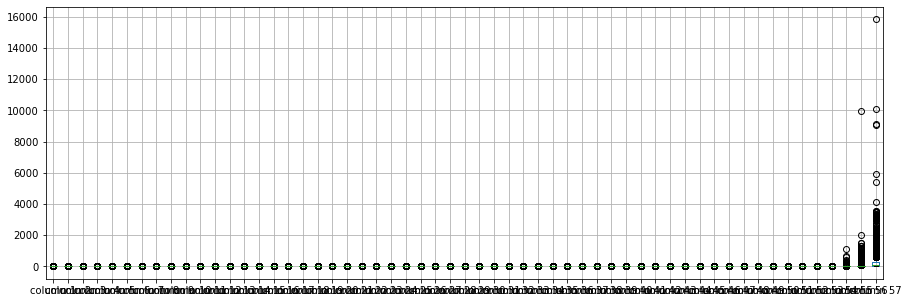

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.105107
column 2       0.214550
column 3       0.280433
column 4       0.064768
column 5       0.310852
column 6       0.095937
column 7       0.114710
column 8       0.105685
column 9       0.090100
column 10      0.239621
column 11      0.059609
column 12      0.542261
column 13      0.093833
column 14      0.058350
column 15      0.048744
column 16      0.248614
column 17      0.142058
column 18      0.185370
column 19      1.661710
column 20      0.086127
column 21      0.807579
column 22      0.122077
column 23      0.101480
column 24      0.092649
column 25      0.555506
column 26      0.267155
column 27      0.767973
column 28      0.127900
column 29      0.097929
column 30      0.104800
column 31      0.062961
column 32      0.045651
column 33      0.098235
column 34      0.047599
column 35      0.107557
column 36      0.099527
column 37      0.137072
column 38      0.013182
column 39      0.080694
column 40      0.063735
column 41      0.043137
column 42      0

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-0.017272,0.066278,0.013530,0.025313,0.056645,0.008001,-0.003994,0.103640,0.041392,...,-0.017859,-0.026950,-0.021052,-0.033219,0.057849,0.117059,-0.010321,0.040440,0.057907,0.081560
column 2,-0.017272,1.000000,-0.036461,-0.006854,-0.024113,-0.023723,0.003327,-0.017222,-0.003986,0.030484,...,-0.015793,-0.006713,-0.052025,-0.019097,-0.015095,-0.010680,0.001657,0.004430,-0.002336,-0.026227
column 3,0.066278,-0.036461,1.000000,-0.019859,0.081464,0.088037,0.036382,0.011831,0.094075,0.032257,...,-0.026247,-0.033308,-0.015442,-0.033727,0.106625,0.091683,-0.003224,0.090371,0.103452,0.062486
column 4,0.013530,-0.006854,-0.019859,1.000000,0.003714,-0.009876,0.019367,0.010476,-0.002463,-0.004677,...,-0.001948,-0.002747,-0.012039,-0.007198,-0.003187,0.015751,-0.001452,0.009299,0.017301,0.012179
column 5,0.025313,-0.024113,0.081464,0.003714,1.000000,0.054963,0.147359,0.028247,0.021454,0.035090,...,-0.032063,-0.035549,-0.048339,-0.026165,0.027294,0.046054,0.003506,0.041398,0.056709,-0.002615
column 6,0.056645,-0.023723,0.088037,-0.009876,0.054963,1.000000,0.061979,0.079692,0.117378,0.014547,...,-0.031432,-0.018946,-0.008510,-0.014529,0.067310,0.112870,0.024447,-0.005966,0.092138,0.074078
column 7,0.008001,0.003327,0.036382,0.019367,0.147359,0.061979,1.000000,0.040530,0.043120,0.054538,...,-0.031981,-0.033832,-0.051855,-0.027640,0.053267,0.074544,0.049283,0.047882,0.053721,-0.011940
column 8,-0.003994,-0.017222,0.011831,0.010476,0.028247,0.079692,0.040530,1.000000,0.108302,0.082149,...,-0.021902,-0.027799,-0.031919,-0.019462,0.031957,0.056484,-0.007955,0.018829,0.035779,0.041131
column 9,0.103640,-0.003986,0.094075,-0.002463,0.021454,0.117378,0.043120,0.108302,1.000000,0.131167,...,-0.025617,-0.013801,-0.032616,0.015444,0.042094,0.142366,-0.002585,0.093026,0.181057,0.238034
column 10,0.041392,0.030484,0.032257,-0.004677,0.035090,0.014547,0.054538,0.082149,0.131167,1.000000,...,-0.016677,0.014128,0.004547,0.007865,0.034881,0.076937,0.047164,0.075089,0.100470,0.083323


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+30,17+30+30,17+30+30+30,17+30+30,17+30,17], vae_layer = False, seed = 300)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 591.7800378301002
Epoch: 1 , loss: 587.7059700464123
Epoch: 2 , loss: 592.8678116216893
Epoch: 3 , loss: 591.0446506992034
Epoch: 4 , loss: 587.4117198505468
Epoch: 5 , loss: 591.2533769773689
Epoch: 6 , loss: 586.6507303324311
Epoch: 7 , loss: 592.8489998209352
Epoch: 8 , loss: 588.552209781022
Epoch: 9 , loss: 580.208708068635
Epoch: 10 , loss: 585.3838147153423
Epoch: 11 , loss: 564.9857791275929
Epoch: 12 , loss: 509.0456213336373
Epoch: 13 , loss: 477.38136892285496
Epoch: 14 , loss: 464.31024861086536
Epoch: 15 , loss: 454.453213920992
Epoch: 16 , loss: 453.31682756802763
Epoch: 17 , loss: 458.42798928184374
Epoch: 18 , loss: 435.5800997371873
Epoch: 19 , loss: 438.4858648585941
Epoch: 20 , loss: 437.5435894158659
Epoch: 21 , loss: 421.41919378619576
Epoch: 22 , loss: 427.52590400084387
Epoch: 23 , loss: 418.4791140406805
Epoch: 24 , loss: 438.8632969607044
Epoch: 25 , loss: 423.31274961677576
Ep

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4597, 57)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      0.000
column 2      0.000
column 3      0.000
column 4      0.000
column 5      0.000
column 6      0.000
column 7      0.000
column 8      0.000
column 9      0.000
column 10     0.000
column 11     0.000
column 12     0.000
column 13     0.000
column 14     0.000
column 15     0.000
column 16     0.000
column 17     0.000
column 18     0.000
column 19     0.000
column 20     0.000
column 21     0.000
column 22     0.000
column 23     0.000
column 24     0.000
column 25     0.000
column 26     0.000
column 27     0.000
column 28     0.000
column 29     0.000
column 30     0.000
column 31     0.000
column 32     0.000
column 33     0.000
column 34     0.000
column 35     0.000
column 36     0.000
column 37     0.000
column 38     0.000
column 39     0.000
column 40     0.000
column 41     0.000
column 42     0.000
column 43     0.000
column 44     0.000
column 45     1.440
column 46     0.000
column 47     0.000
column 48     0.000
column 49     0.000
column 50     0.196


In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.071922,0.0,0.000000,0.0,0.0,0.0,0.0,0.051596,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.003908,0.014607,0.000000,0.000000,-82.507420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4593,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.082728,0.0,0.000000,0.000000,0.000000,-1.709368,0.000000,2.241974
4594,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4595,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

15580.306230825096

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

47458.653692284744

In [18]:
NRMS=numerator/denominator
NRMS


0.3282922084525536

In [19]:
new_df.iloc[66,:]

column 1       0.000
column 2       0.440
column 3       0.890
column 4       0.000
column 5       0.440
column 6       0.000
column 7       0.000
column 8       0.000
column 9       0.000
column 10      0.000
column 11      0.000
column 12      0.440
column 13      0.000
column 14      0.000
column 15      0.000
column 16      0.440
column 17      0.000
column 18      0.890
column 19      2.240
column 20      0.000
column 21      1.340
column 22      0.000
column 23      0.000
column 24      0.000
column 25      0.000
column 26      0.000
column 27      0.000
column 28      0.000
column 29      0.000
column 30      0.000
column 31      0.000
column 32      0.000
column 33      0.000
column 34      0.000
column 35      0.000
column 36      0.000
column 37      0.000
column 38      0.000
column 39      0.000
column 40      0.000
column 41      0.000
column 42      0.000
column 43      0.000
column 44      0.000
column 45      0.440
column 46      0.000
column 47      0.000
column 48    

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.640000,0.64,0.000000,0.32,0.00,0.00,0.00,0.000000,0.00,...,0.0,0.0,0.000000,0.0,0.778000,0.000000,0.000000,3.756000,61.000000,278.000000
1,0.21,0.280000,0.50,0.000000,0.14,0.28,0.21,0.07,0.000000,0.94,...,0.0,0.0,0.132000,0.0,0.372000,0.180000,0.048000,5.114000,101.000000,1028.000000
2,0.00,0.000000,0.00,0.000000,0.63,0.00,0.31,0.63,0.310000,0.63,...,0.0,0.0,0.135000,0.0,0.135000,0.000000,0.000000,3.537000,40.000000,191.000000
3,0.00,0.000000,0.00,0.000000,1.85,0.00,0.00,1.85,0.000000,0.00,...,0.0,0.0,0.223000,0.0,0.000000,0.000000,0.000000,3.000000,15.000000,54.000000
4,0.00,0.071922,0.00,0.000000,1.92,0.00,0.00,0.00,0.051596,0.64,...,0.0,0.0,0.054000,0.0,0.164000,0.057908,0.014607,1.671000,4.000000,29.492580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.000000,0.64,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00,...,0.0,0.0,0.348000,0.0,1.160000,0.000000,0.000000,3.121000,15.000000,103.000000
4593,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00,...,0.0,0.0,0.082728,0.0,0.000000,0.000000,0.000000,1.333632,15.000000,72.241974
4594,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00,...,0.0,0.0,0.136000,0.0,0.000000,0.000000,0.409000,1.837000,12.000000,68.000000
4595,0.17,0.000000,0.68,0.000000,0.34,0.34,0.00,0.00,0.000000,0.00,...,0.0,0.0,0.032000,0.0,0.065000,0.000000,0.000000,1.189000,5.000000,69.000000


In [21]:
imputations[-1].to_excel("Spam_AE_1(imp).xlsx", index=False, header=False)